## Test 1. My first data science project

### In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.

### You are expected to submit the code developed as well as a brief description of your findings and insights.

### This lab represents 30% of the total marking of the module¶

TO DO: Description of the challenge

### Let's load and install some libraries

In [1]:
!pip install py-openaq

In [2]:
import pandas as pd
import seaborn as sns
import openaq
import matplotlib as mpl
import matplotlib.pyplot as plt

### Let's load the dataset

In [3]:
airQualityCities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/airQualityCities.csv')

In [4]:
airQualityCities.sample(5)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
31088,2021-09-29 10:30:00,"Okhla Phase-2, Delhi - DPCC",so2,7.50,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 05:00:00+00:00,28.530785,77.271255
35438,2021-09-29 00:15:00,"Major Dhyan Chand National Stadium, Delhi - DPCC",o3,2.50,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 18:45:00+00:00,28.611281,77.237738
12003,2021-10-05 01:00:00,ES1810A,co,100.00,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-04 23:00:00+00:00,40.251940,-4.274720
7733,2021-10-07 18:00:00,FR04329,no2,81.00,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-10-07 16:00:00+00:00,48.838603,2.412785
7189,2021-10-08 03:00:00,DEBE063,pm25,20.61,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-10-08 01:00:00+00:00,52.467534,13.441654


In [5]:
airQualityCities.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [6]:
airQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             37087 non-null  object 
 1   location               37087 non-null  object 
 2   parameter              37087 non-null  object 
 3   value                  37087 non-null  float64
 4   unit                   37087 non-null  object 
 5   country                37087 non-null  object 
 6   city                   37087 non-null  object 
 7   date.utc               37087 non-null  object 
 8   coordinates.latitude   37087 non-null  float64
 9   coordinates.longitude  37087 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [7]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


In [8]:
airQualityCities.groupby('unit').count()

,date.local,location,parameter,value,country,city,date.utc,coordinates.latitude,coordinates.longitude
unit,,,,,,,,,
b'\xc2\xb5g/m\xc2\xb3',36792,36792,36792,36792,36792,36792,36792,36792,36792
ppm,295,295,295,295,295,295,295,295,295


In [9]:
airQualityCities.groupby('parameter').count()

,date.local,location,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
parameter,,,,,,,,,
co,3248,3248,3248,3248,3248,3248,3248,3248,3248
no2,10417,10417,10417,10417,10417,10417,10417,10417,10417
o3,7401,7401,7401,7401,7401,7401,7401,7401,7401
pm10,7206,7206,7206,7206,7206,7206,7206,7206,7206
pm25,5783,5783,5783,5783,5783,5783,5783,5783,5783
so2,3032,3032,3032,3032,3032,3032,3032,3032,3032


## Question 1. Find cities with levels of O3 larger than 120 µg/m³ 

In [10]:
largeO3 = airQualityCities[(airQualityCities['parameter']=='o3')&(airQualityCities['value']>120)]

In [11]:
largeO3.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Delhi,10,10,10,10,10,10,10,10,10
Madrid,1,1,1,1,1,1,1,1,1


In [12]:
### The answer of question 1
### According to the table above, Delhi and Madrid are levels of O3 large than 120 µg/m³.

## Question 2. Which city has the cleanest air ?
### Tip: consider adapting the following example: https://seaborn.pydata.org/examples/grouped_boxplot.html

In [14]:
airQualityCities[miuns].shape

(82, 10)

In [244]:
pollutant_mean=airQualityCities.groupby('city').mean()

In [248]:
pollutant_mean

,value,coordinates.latitude,coordinates.longitude
city,,,
Beijing,-780.380000,39.950000,116.470000
Berlin,25.593749,51.426917,2.302139
Delhi,189.610243,28.639710,77.178494
London,19.402807,51.505170,0.138843
Madrid,45.850196,40.427249,-3.683540
Paris,31.001098,48.855376,2.347121


In [251]:
pollutant_mean_type=airQualityCities.groupby(['city','parameter']).mean()

In [252]:
pollutant_mean_type

value  coordinates.latitude  coordinates.longitude
city    parameter                                                         
Beijing pm25      -780.380000             39.950000             116.470000
Berlin  co         267.555556             52.488841              13.394091
        no2         16.033369             52.500840              13.401215
        o3          14.868796             48.746240             -25.479339
        pm10        18.440835             52.497737              13.414482
        pm25        12.687855             52.497792              13.414072
Delhi   co         984.832721             28.638424              77.174271
        no2         21.598024             28.638620              77.177797
        o3          24.051291             28.638154              77.176585
        pm10        88.123526             28.639336              77.175901
        pm25        21.445833             28.640278              77.183718
        so2          8.670405             28.644236              77.182874
London  no2         18.745915             51.512273               0.093549
        o3          36.179387             51.512680               0.117678
        pm10        12.079461             51.494645               0.188329
        pm25         7.069494             51.501662               0.136565
        so2          1.596386             51.477070               0.317969
Madrid  co         360.816327             40.474462              -3.667983
        no2         23.337947             40.418497              -3.683917
        o3          44.216649             40.415188              -3.687000
        pm10        14.466007             40.425004              -3.691209
        pm25         8.878225             40.426026              -3.666303
        so2          2.397490             40.473558              -3.695057
Paris   no2         34.055988             48.853514               2.346849
        o3          41.492475             48.860773               2.353337
        pm10        21.637607             48.859677               2.335382
        pm25        12.278495             48.838603               2.412785

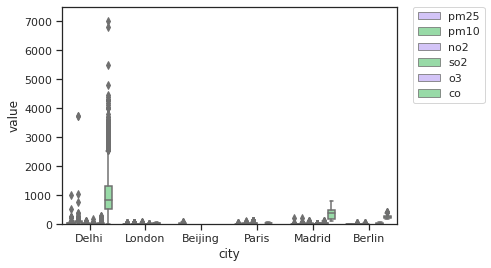

In [54]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="city", y="value",
            hue="parameter", palette=["m", "g"],
            data=airQualityCities)

plt.ylim(0, 7500)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(0.0, 1000.0)

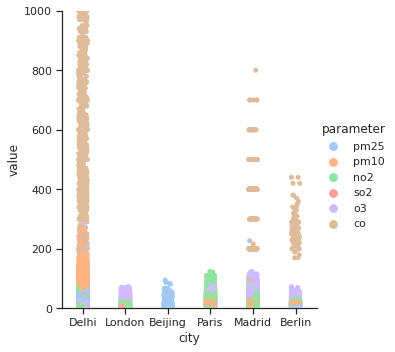

In [67]:
sns.catplot(x="city", y="value",
            hue="parameter",
            data=airQualityCities)
plt.ylim(0, 1000)

In [ ]:
### The answer to question 2
### According to pollutant_mean_type table, most of the fiqures in London and Berlin have the lowest value.
### Further, the amount of co in Berlin is very high, harming human health.
### Therefore, the city which has the cleanest air is London.

## Question 3. Which location is the most poluted in London ?

In [103]:
pd.set_option('display.max_rows',50)

In [104]:
LONDON = airQualityCities[airQualityCities['city']=='London']

In [149]:
LONDON_Mean = LONDON.groupby(['location','parameter']).mean()

In [150]:
LONDON_Mean

value  coordinates.latitude  \
location                          parameter                                    
London Eltham                     no2        13.364259             51.452580   
                                  o3         33.454789             51.452580   
                                  pm10       10.614747             51.452580   
                                  pm25        7.262673             51.452580   
London Haringey Priory Park South no2        17.434932             51.584128   
                                  o3         40.198813             51.584128   
London Harlington                 no2        20.729642             51.488790   
                                  o3         36.493151             51.488790   
                                  pm10       10.040956             51.488790   
                                  pm25        6.187713             51.488790   
Southend-on-Sea                   no2        15.294985             51.544206   
                                  o3         39.855030             51.544206   
                                  pm10       11.887906             51.544206   
                                  pm25        7.707965             51.544206   
Thurrock                          no2        20.865192             51.477070   
                                  o3         30.346313             51.477070   
                                  pm10       14.970501             51.477070   
                                  so2         1.596386             51.477070   
Tower Hamlets Roadside            no2        24.288514             51.522530   

                                             coordinates.longitude  
location                          parameter                         
London Eltham                     no2                     0.070766  
                                  o3                      0.070766  
                                  pm10                    0.070766  
                                  pm25                    0.070766  
London Haringey Priory Park South no2                    -0.125254  
                                  o3                     -0.125254  
London Harlington                 no2                    -0.441614  
                                  o3                     -0.441614  
                                  pm10                   -0.441614  
                                  pm25                   -0.441614  
Southend-on-Sea                   no2                     0.678408  
                                  o3                      0.678408  
                                  pm10                    0.678408  
                                  pm25                    0.678408  
Thurrock                          no2                     0.317969  
                                  o3                      0.317969  
                                  pm10                    0.317969  
                                  so2                     0.317969  
Tower Hamlets Roadside            no2                    -0.042155

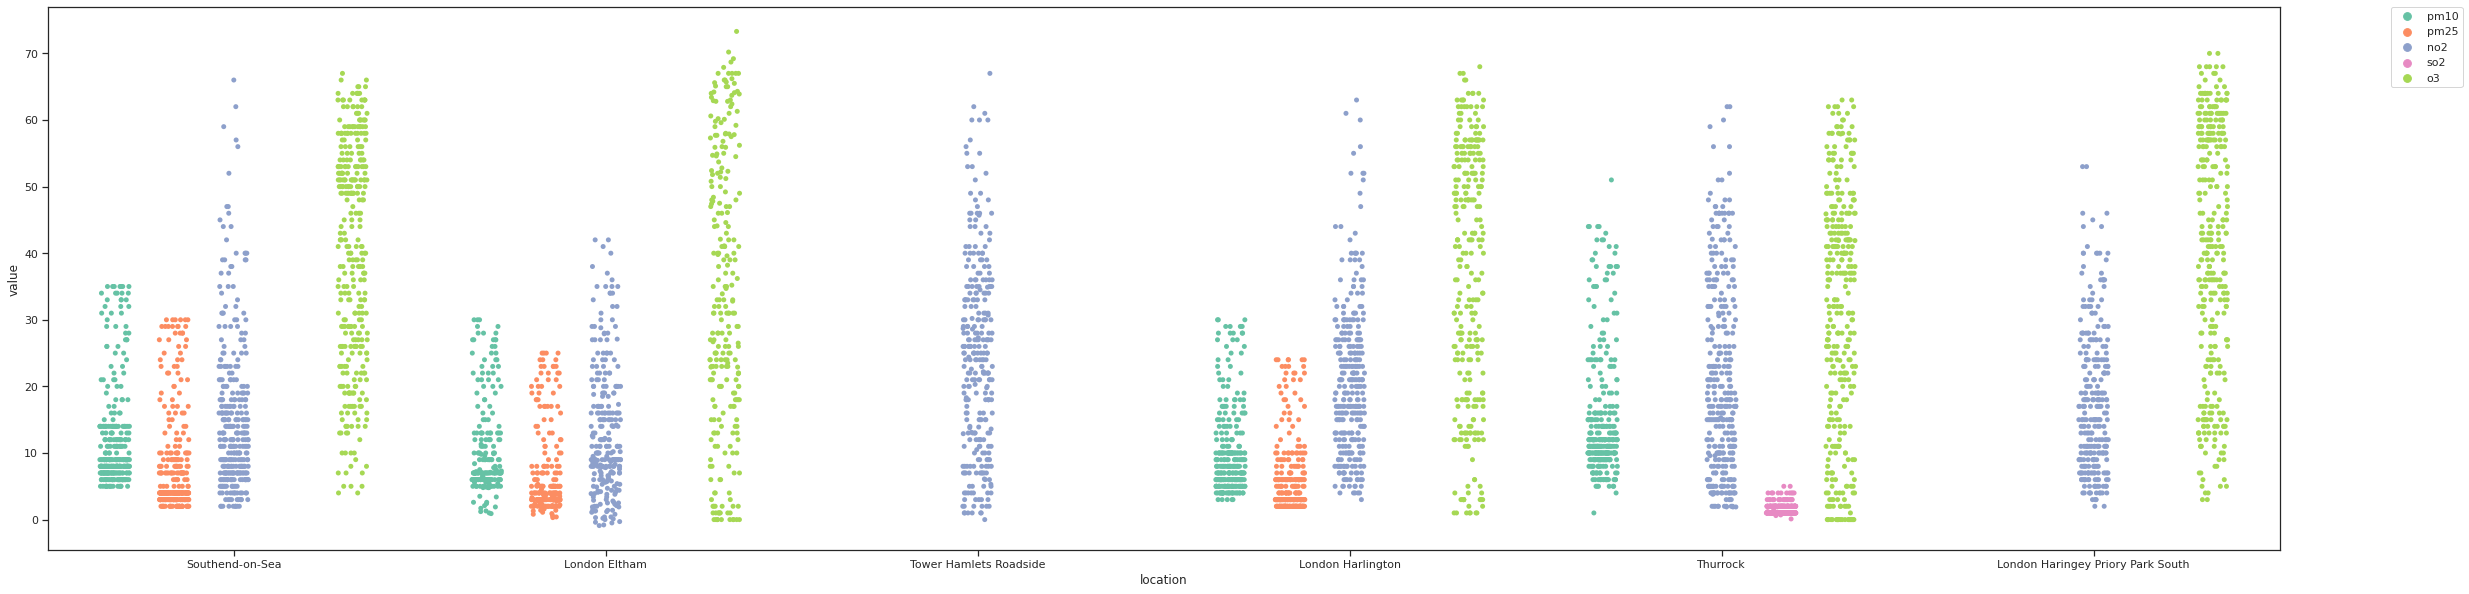

In [155]:
plt.figure(figsize=(40,10))
sns.stripplot(x='location',y='value',hue='parameter',data=LONDON,jitter=0.2,dodge=True,palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [156]:
### The answer to question 3
### According to the scatterplot above, it shows Southend-on-Sea, London Eltham , and London Harlington are all have four types of pollutants.
### Besides, according the LONDON_Mean table, it shows the highest avarage amount of pollutants is London Harlington.
### So the most poluted in London is London Harlington.

## Question 4. Plot the evolution of air polution accross time in locations in London
### Tip: Consider using Relplot: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

In [18]:
airQualityCities['date']=pd.to_datetime(airQualityCities['date.local'])

In [21]:
LONDON.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5772 entries, 1 to 37014
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date.local             5772 non-null   object        
 1   location               5772 non-null   object        
 2   parameter              5772 non-null   object        
 3   value                  5772 non-null   float64       
 4   unit                   5772 non-null   object        
 5   country                5772 non-null   object        
 6   city                   5772 non-null   object        
 7   date.utc               5772 non-null   object        
 8   coordinates.latitude   5772 non-null   float64       
 9   coordinates.longitude  5772 non-null   float64       
 10  date                   5772 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 541.1+ KB


<Figure size 2880x2880 with 0 Axes>

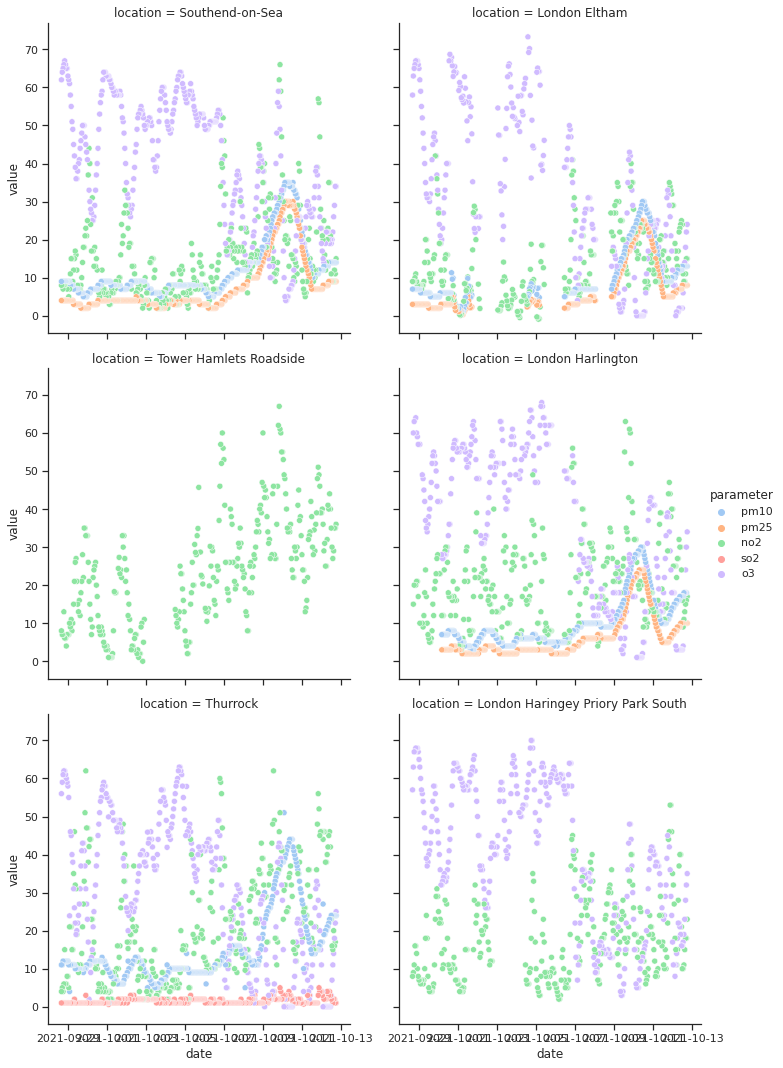

In [93]:
plt.figure(figsize=(40,40))
sns.relplot(data=LONDON, x="date", y="value", hue="parameter", col="location", col_wrap=2)

In [ ]:
### The answer to question 3
### According to the diagrams above,it show how the the evolution of air polution accross time in London by locations.

## Question 5: Is there any relationship between levels of PM25 and PM10 in London?

In [ ]:
### response: they are strongly correlated

In [75]:
LONDON_PP =LONDON[(LONDON['parameter']=='pm25')|(LONDON['parameter']=='pm10')]

In [77]:
LONDON_PP

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude,date
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408,2021-10-12 18:00:00
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766,2021-10-12 18:00:00
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614,2021-10-12 18:00:00
8,2021-10-12 18:00:00,London Eltham,pm10,13.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766,2021-10-12 18:00:00
9,2021-10-12 18:00:00,London Harlington,pm25,10.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614,2021-10-12 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...
36873,2021-09-28 16:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.544206,0.678408,2021-09-28 16:00:00
36900,2021-09-28 16:00:00,Southend-on-Sea,pm10,9.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.544206,0.678408,2021-09-28 16:00:00
36940,2021-09-28 16:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.452580,0.070766,2021-09-28 16:00:00
36965,2021-09-28 16:00:00,Thurrock,pm10,11.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.477070,0.317969,2021-09-28 16:00:00


In [84]:
LONDON_AA = LONDON_PP.groupby(['location','parameter']).mean()

In [86]:
LONDON_AA 

value  coordinates.latitude  \
location          parameter                                    
London Eltham     pm10       10.614747             51.452580   
                  pm25        7.262673             51.452580   
London Harlington pm10       10.040956             51.488790   
                  pm25        6.187713             51.488790   
Southend-on-Sea   pm10       11.887906             51.544206   
                  pm25        7.707965             51.544206   
Thurrock          pm10       14.970501             51.477070   

                             coordinates.longitude  
location          parameter                         
London Eltham     pm10                    0.070766  
                  pm25                    0.070766  
London Harlington pm10                   -0.441614  
                  pm25                   -0.441614  
Southend-on-Sea   pm10                    0.678408  
                  pm25                    0.678408  
Thurrock          pm10                    0.317969

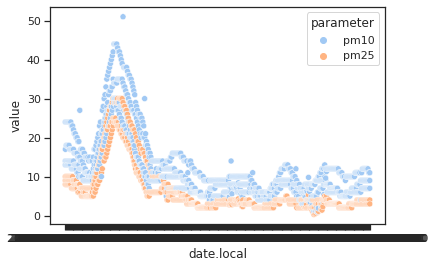

In [158]:
sns.scatterplot(
    data=LONDON_PP, x="date.local", y="value",hue='parameter',
    sizes=(20, 20), legend="full"
)

In [161]:
LONDON_pm25 =LONDON[LONDON['parameter']=='pm25']

In [167]:
LONDON_pm25

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude,date
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766,2021-10-12 18:00:00
9,2021-10-12 18:00:00,London Harlington,pm25,10.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614,2021-10-12 18:00:00
12,2021-10-12 18:00:00,Southend-on-Sea,pm25,9.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408,2021-10-12 18:00:00
23,2021-10-12 17:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 16:00:00+00:00,51.452580,0.070766,2021-10-12 17:00:00
30,2021-10-12 17:00:00,London Harlington,pm25,10.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 16:00:00+00:00,51.488790,-0.441614,2021-10-12 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...
36103,2021-09-28 18:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 17:00:00+00:00,51.452580,0.070766,2021-09-28 18:00:00
36468,2021-09-28 17:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.544206,0.678408,2021-09-28 17:00:00
36594,2021-09-28 17:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.452580,0.070766,2021-09-28 17:00:00
36873,2021-09-28 16:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.544206,0.678408,2021-09-28 16:00:00


In [190]:
LONDON_pm25_fliter = LONDON_pm25.iloc[:,0:4]

In [191]:
LONDON_pm25_fliter

,date.local,location,parameter,value
2,2021-10-12 18:00:00,London Eltham,pm25,8.0
9,2021-10-12 18:00:00,London Harlington,pm25,10.0
12,2021-10-12 18:00:00,Southend-on-Sea,pm25,9.0
23,2021-10-12 17:00:00,London Eltham,pm25,8.0
30,2021-10-12 17:00:00,London Harlington,pm25,10.0
...,...,...,...,...
36103,2021-09-28 18:00:00,London Eltham,pm25,3.0
36468,2021-09-28 17:00:00,Southend-on-Sea,pm25,4.0
36594,2021-09-28 17:00:00,London Eltham,pm25,3.0
36873,2021-09-28 16:00:00,Southend-on-Sea,pm25,4.0


In [184]:
LONDON_pm10 =LONDON[LONDON['parameter']=='pm10']

In [195]:
LONDON_pm10_fliter = LONDON_pm10.iloc[:,0:4]

In [197]:
LONDON_pm10_fliter['new']=LONDON_pm10_fliter['date.local']+LONDON_pm10_fliter['location']

In [204]:
LONDON_pm25_fliter['new']=LONDON_pm25_fliter['date.local']+LONDON_pm25_fliter['location']

In [206]:
LONDON_pm25_fliter

,date.local,location,parameter,value,new
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,2021-10-12 18:00:00London Eltham
9,2021-10-12 18:00:00,London Harlington,pm25,10.0,2021-10-12 18:00:00London Harlington
12,2021-10-12 18:00:00,Southend-on-Sea,pm25,9.0,2021-10-12 18:00:00Southend-on-Sea
23,2021-10-12 17:00:00,London Eltham,pm25,8.0,2021-10-12 17:00:00London Eltham
30,2021-10-12 17:00:00,London Harlington,pm25,10.0,2021-10-12 17:00:00London Harlington
...,...,...,...,...,...
36103,2021-09-28 18:00:00,London Eltham,pm25,3.0,2021-09-28 18:00:00London Eltham
36468,2021-09-28 17:00:00,Southend-on-Sea,pm25,4.0,2021-09-28 17:00:00Southend-on-Sea
36594,2021-09-28 17:00:00,London Eltham,pm25,3.0,2021-09-28 17:00:00London Eltham
36873,2021-09-28 16:00:00,Southend-on-Sea,pm25,4.0,2021-09-28 16:00:00Southend-on-Sea


In [216]:
pm10_pm25 = pd.merge(LONDON_pm25_fliter, LONDON_pm10_fliter,how='right', on='new')

In [217]:
pm10_pm25

,date.local_x,location_x,parameter_x,value_x,new,date.local_y,location_y,parameter_y,value_y
0,2021-10-12 18:00:00,Southend-on-Sea,pm25,9.0,2021-10-12 18:00:00Southend-on-Sea,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0
1,2021-10-12 18:00:00,London Harlington,pm25,10.0,2021-10-12 18:00:00London Harlington,2021-10-12 18:00:00,London Harlington,pm10,17.0
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,2021-10-12 18:00:00London Eltham,2021-10-12 18:00:00,London Eltham,pm10,13.0
3,NaN,NaN,NaN,NaN,2021-10-12 18:00:00Thurrock,2021-10-12 18:00:00,Thurrock,pm10,24.0
4,2021-10-12 17:00:00,London Eltham,pm25,8.0,2021-10-12 17:00:00London Eltham,2021-10-12 17:00:00,London Eltham,pm10,13.0
...,...,...,...,...,...,...,...,...,...
1183,2021-09-28 17:00:00,Southend-on-Sea,pm25,4.0,2021-09-28 17:00:00Southend-on-Sea,2021-09-28 17:00:00,Southend-on-Sea,pm10,9.0
1184,2021-09-28 17:00:00,London Eltham,pm25,3.0,2021-09-28 17:00:00London Eltham,2021-09-28 17:00:00,London Eltham,pm10,7.0
1185,2021-09-28 16:00:00,Southend-on-Sea,pm25,4.0,2021-09-28 16:00:00Southend-on-Sea,2021-09-28 16:00:00,Southend-on-Sea,pm10,9.0
1186,NaN,NaN,NaN,NaN,2021-09-28 16:00:00Thurrock,2021-09-28 16:00:00,Thurrock,pm10,11.0


Text(0, 0.5, 'PM10')

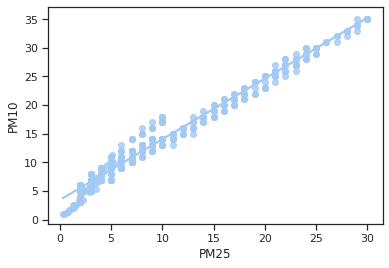

In [223]:
pm = sns.regplot(
    data=pm10_pm25, x="value_x", y="value_y")
pm.set_xlabel('PM25')
pm.set_ylabel('PM10')

In [221]:
### The answer to question 5
### According to the scatterplot above, putting pm25 value on the x-axis and pm10 on the y-axis, It show these two fiqures have highly positive correlatio